In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from lafomo.datasets import DrosophilaSpatialTranscriptomics, ToySpatialTranscriptomics
from experiments.partial import build_partial, plot_partial
from pathlib import Path
from lafomo.plot import Colours, tight_kwargs

filepath = lambda name: np.load(f'./dros-kr/partial/{name}.npy')
loss_with = filepath('trainloss_with')
loss_without = filepath('trainloss_without')
time_with = filepath('traintime_with')
time_without = filepath('traintime_without')

/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_asarray.py:102:

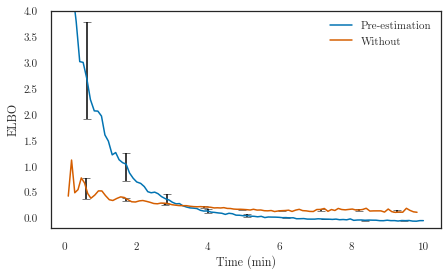

In [3]:
plt.figure(figsize=(7, 4))
def plot_errorbars(times, losses, nbins=10, start_index=0, color='black', label=''):
    times = times[:, start_index:]
    losses = losses[:, start_index:]
    bucket_ind = np.digitize(
        times, np.linspace(times.min(), times.max(), nbins))

    for i in range(10):
        time_bucket = times[bucket_ind == i]
        loss_bucket = losses[bucket_ind == i]
        plt.errorbar(time_bucket.mean(0), loss_bucket.mean(0), loss_bucket.std(0),
                     color='black', capsize=4, markeredgewidth=0.5)
    plt.plot(times.mean(0), losses.mean(0), color=color, label=label)

# these errorbars are incorrect. try for example with one sample.
plot_errorbars(time_with, loss_with, color=Colours.line_color, start_index=150, label='Pre-estimation')
plot_errorbars(time_without, loss_without, color=Colours.scatter_color, label='Without')
plt.ylim(-0.2, 4)
plt.xlabel('Time (min)')
plt.ylabel('ELBO')
plt.legend()
plt.savefig('preestimation_dros.pdf', **tight_kwargs)

In [45]:
drosophila = True

if drosophila:
    data = 'dros-kr'
    dataset = DrosophilaSpatialTranscriptomics(gene='kr', data_dir='../data', scale=True)
    params = dict(lengthscale=10,
                  sensitivity=0.0970,
                  decay=0.0764,
                  diffusion=0.0015,
                  parameter_grad=False,
                  warm_epochs=-1,
                  natural=False,
                  clamp=True)
else:
    data = 'toy-spatial'
    dataset = ToySpatialTranscriptomics(data_dir='../data')
    params = dict(lengthscale=0.3,
                  sensitivity=1,
                  decay=0.1,
                  diffusion=0.01,
                  natural=False,
                  clamp=False)

t_sorted, dp [53.925 60.175 66.425 72.675 78.925 85.175 91.425 97.675] 6.25
x dp is set to 1.0
t_sorted, dp [25.5 26.5 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5
 39.5 40.5 41.5 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5
 53.5 54.5 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5
 67.5 68.5 69.5 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 80.5
 81.5 82.5 83.5 84.5 85.5 86.5 87.5 88.5] 1.0


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


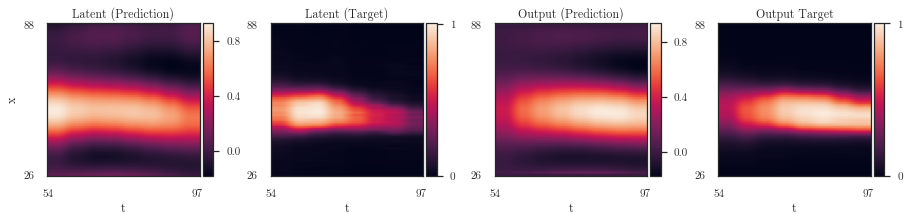

In [46]:
lfm, trainer, plotter = build_partial(
    dataset,
    params,
    reload=f'{data}/partial/model_with_0')
plot_partial(dataset, lfm, trainer, plotter, Path('./'), params)

t_sorted, dp [53.925 60.175 66.425 72.675 78.925 85.175 91.425 97.675] 6.25
x dp is set to 1.0
t_sorted, dp [25.5 26.5 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5
 39.5 40.5 41.5 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5
 53.5 54.5 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5
 67.5 68.5 69.5 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 80.5
 81.5 82.5 83.5 84.5 85.5 86.5 87.5 88.5] 1.0


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


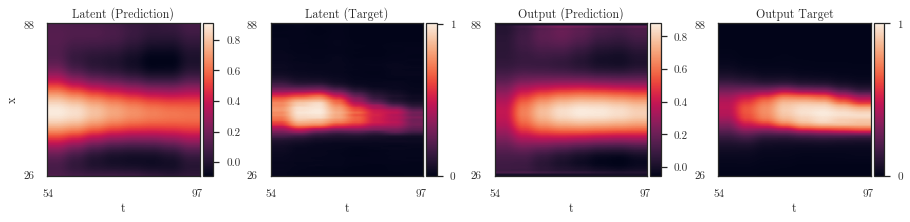

In [47]:
lfm, trainer, plotter = build_partial(
    dataset,
    params,
    reload=f'{data}/partial/model_without_0')
plot_partial(dataset, lfm, trainer, plotter, Path('./'), params)


In [52]:
trace_with = torch.load('dros-kr/partial/parameter_trace_with_0.pt')
trace_without = torch.load('dros-kr/partial/parameter_trace_without_0.pt')

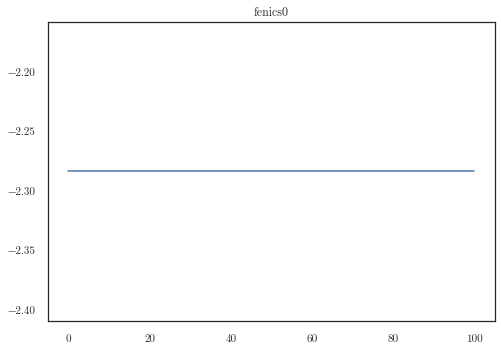

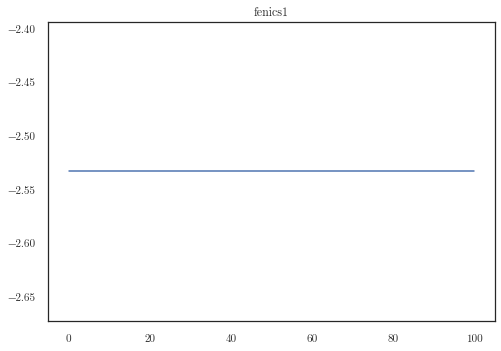

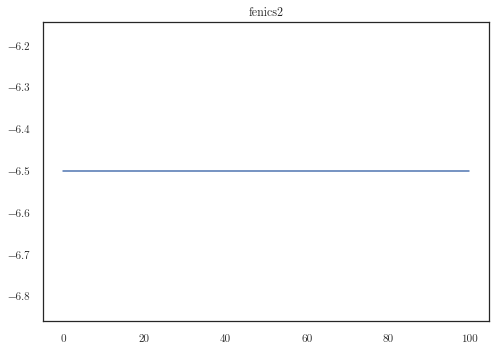

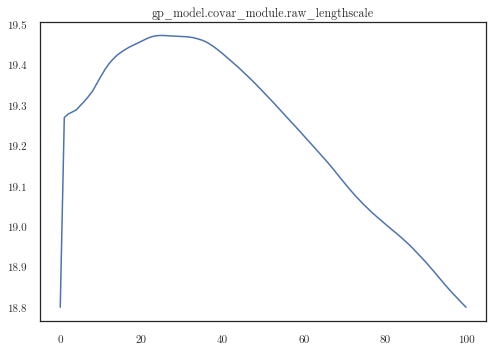

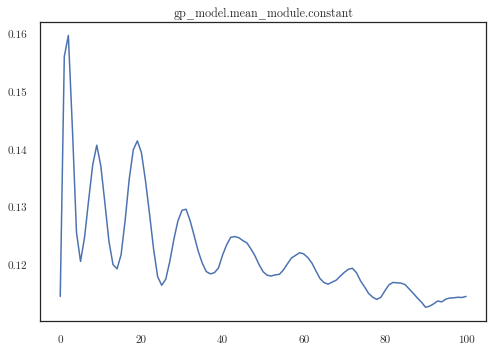

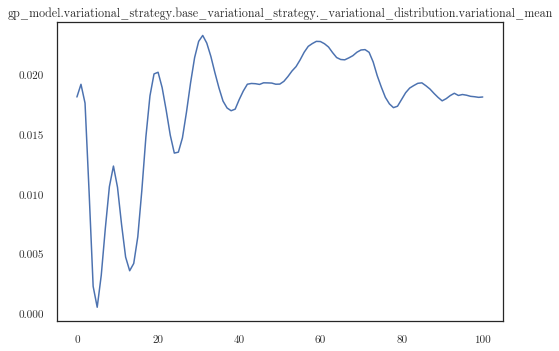

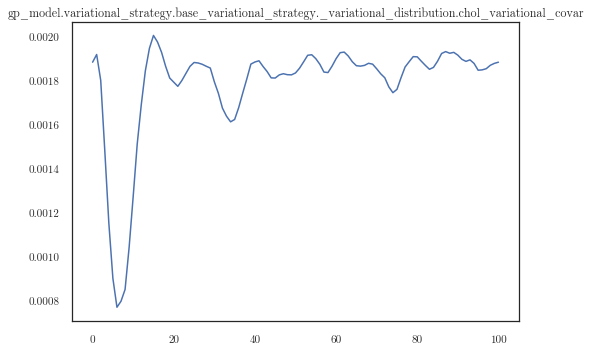

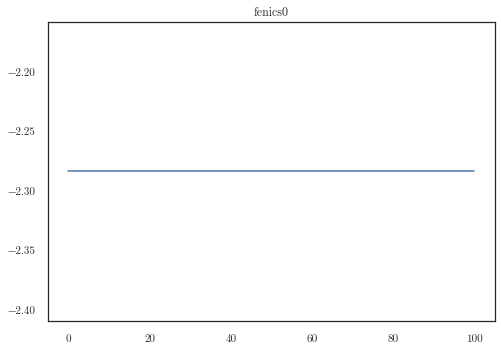

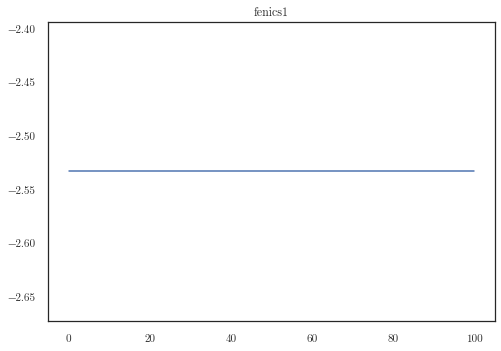

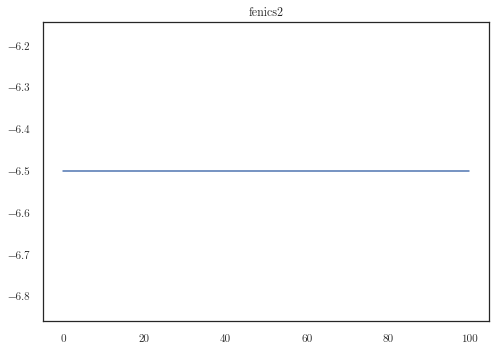

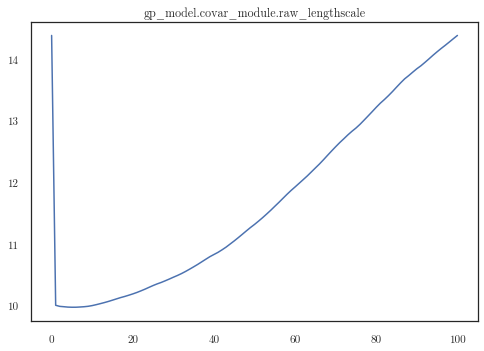

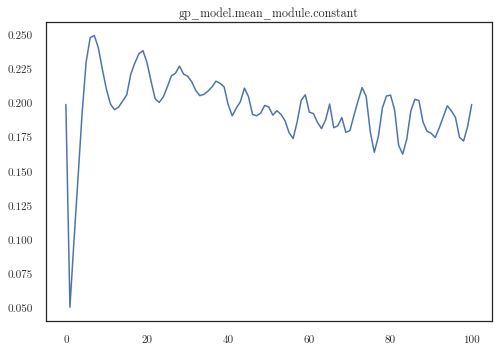

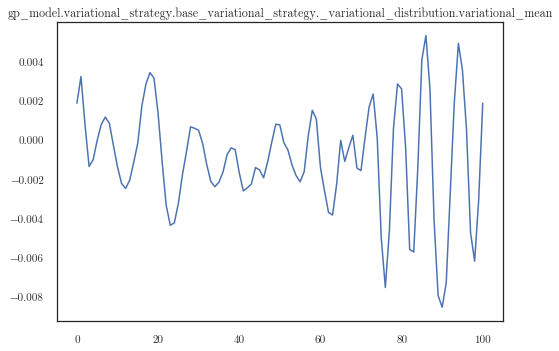

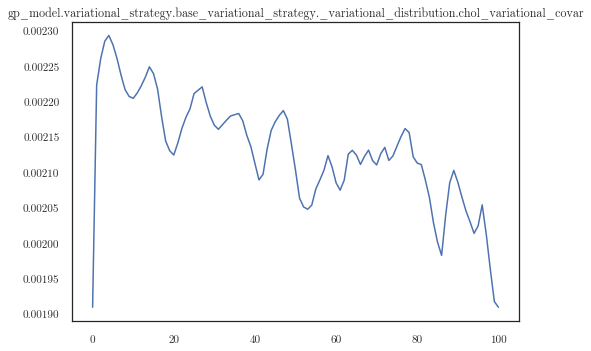

In [55]:
def plot_trace(trace):
    for key in trace.keys():
        params = torch.stack(trace[key])
        for i in range(1, params.ndim):
            params = params.mean(-1)
        plt.figure()
        plt.plot(params)
        plt.title(key)
plot_trace(trace_with)
plot_trace(trace_without)